   # Exploring Statistical Methods on **PRE-CLEANED** bigram frequencies

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import statistics as stat

import numpy as np
from math import sqrt

INPUT_FREQ_PATH = Path(
        '/share/compling/projects/sanpi/results/freq_out/RBXadj/all_adj-x-adv_frq-thr0-001p.35f=868+.pkl.gz')
ADV_REPRESENT = 'adv_form_lower'
ADJ_REPRESENT = 'adj_form_lower'
# _LSC_DATA_DIR = Path("/share/compling/projects/sanpi/source/LSC/data")
orig_frq = None

 ## Load cleaned & limited frequency table

In [3]:
if orig_frq is not None:
    frq_raw = orig_frq
    
else:
    
    frq_raw = pd.read_csv(INPUT_FREQ_PATH) if INPUT_FREQ_PATH.suffix=='.csv' else pd.read_pickle(INPUT_FREQ_PATH)
    frq_raw.columns = frq_raw.columns.str.strip()
    
    if ADV_REPRESENT in frq_raw.columns:
        frq_raw = frq_raw.set_index(ADV_REPRESENT).transpose()
    if frq_raw.index.name != ADJ_REPRESENT:
        if ADJ_REPRESENT in frq_raw.columns:
            frq_raw = frq_raw.set_index(ADJ_REPRESENT)
        else:
            frq_raw.index.name = ADJ_REPRESENT
    frq_raw = frq_raw.apply(pd.to_numeric, downcast='unsigned')
    frq_raw.columns.name = ADV_REPRESENT
    frq_raw.columns = frq_raw.columns.astype('string')
    if 'SUM' in frq_raw.index:
        SUM_row = frq_raw.loc['SUM', :]
    if 'SUM' in frq_raw.columns:
        SUM_col = frq_raw.loc[:, 'SUM']
    frq_raw = frq_raw.loc[frq_raw.index !=
                              'SUM', frq_raw.columns != 'SUM']
    print(frq_raw.shape[0], 'rows (adj)')
    print(frq_raw.shape[1], 'columns (adv)')
    frq_raw.index = frq_raw.index.astype('string')
    orig_frq = frq_raw.copy()
frq_raw

3894 rows (adj)
1005 columns (adv)


adv_form_lower,very,more,most,so,not,as,too,really,much,pretty,...,scandalously,urgently,intolerably,madly,touchingly,on,emphatically,second-most,cosmetically,pointedly
adj_form_lower,,,,,,,,,,,,,,,,,,,,,
many,21237,373,140,1191864,58442,434631,450194,518,201,54,...,0,0,0,0,0,1,3,0,0,0
important,359610,306604,748533,105509,17351,102823,12879,72175,1826,6594,...,0,120,1,1,0,0,2,105,9,0
good,507499,18902,5207,153196,96143,235348,59683,260281,14343,243692,...,11,2,1,4,1,1,6,0,7,0
much,42365,102,22,614652,66410,355368,583184,3066,284,57884,...,0,0,0,0,0,95,0,0,0,1
likely,35899,498401,192635,847,46858,31820,1196,466,259,1312,...,0,0,0,0,0,0,0,12,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
untrained,9,10,43,11,5,14,8,1,1,3,...,0,0,0,0,0,0,0,0,0,0
carnal,34,150,62,27,234,20,10,3,3,0,...,0,0,0,0,0,0,0,0,0,0
contiguous,4,106,8,6,200,7,1,3,5,4,...,0,0,0,0,0,0,0,0,0,0


In [4]:
def _enhance_descrip(df: pd.DataFrame) -> pd.DataFrame:
    df = df
    desc = df.describe().transpose()
    desc = desc.assign(total=pd.to_numeric(df.sum()),
                       var_coeff=desc['std'] / desc['mean'],
                       range=desc['max'] - desc['min'],
                       IQ_range=desc['75%'] - desc['25%'])
    desc = desc.assign(upper_fence=desc['75%'] + (desc.IQ_range * 1.5),
                       lower_fence=desc['25%'] - (desc.IQ_range * 1.5))
    if 'SUM' not in desc.index:
        desc = desc.assign(
            plus1_geo_mean=df.add(1).apply(stat.geometric_mean),
            plus1_har_mean=df.add(1).apply(stat.harmonic_mean))
    for col in desc.columns:
        if col in ('mean', 'std', 'variance', 'var_coeff'):
            desc.loc[:, col] = desc[col].round(1)
        else:
            desc.loc[:, col] = pd.to_numeric(desc[col], downcast='unsigned')

    # mean_centr = no_sum_frame - no_sum_frame.mean()
    # mean_stand = no_sum_frame / no_sum_frame.mean()
    # mean_stand_centr = mean_stand - mean_stand.mean()
    # log2_trans = no_sum_frame.apply(np.log2)
    # log2_plus1_trans = no_sum_frame.add(1).apply(np.log2)
    # logn_plus1_trans = no_sum_frame.apply(np.log1p)

    return desc.round(1)

_enhance_descrip(frq_raw)

,count,mean,std,min,25%,50%,75%,max,total,var_coeff,range,IQ_range,upper_fence,lower_fence,plus1_geo_mean,plus1_har_mean
adv_form_lower,,,,,,,,,,,,,,,,
very,3894,2545.8,15366.1,0,43.0,155,682.2,507499,9913432,6.0,507499,639.2,1641.1,-915.9,169.6,18.6
more,3894,2393.7,12671.8,0,106.0,322,1095.8,498401,9320997,5.3,498401,989.8,2580.4,-1378.6,358.8,72.3
most,3894,1943.7,16914.8,0,39.0,145,587.0,748533,7568812,8.7,748533,548.0,1409.0,-783.0,154.5,21.3
so,3894,1473.0,22111.4,0,32.0,112,378.0,1191864,5735964,15.0,1191864,346.0,897.0,-487.0,115.1,19.3
not,3894,1134.0,9871.3,0,20.0,69,271.8,467213,4415785,8.7,467213,251.8,649.4,-357.6,80.2,14.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
on,3894,0.2,4.3,0,0.0,0,0.0,223,872,19.3,223,0.0,0.0,0.0,1.0,1.0
emphatically,3894,0.2,2.0,0,0.0,0,0.0,108,872,8.8,108,0.0,0.0,0.0,1.1,1.1
second-most,3894,0.2,4.0,0,0.0,0,0.0,163,869,18.1,163,0.0,0.0,0.0,1.0,1.0


In [5]:
_enhance_descrip(frq_raw.T)

,count,mean,std,min,25%,50%,75%,max,total,var_coeff,range,IQ_range,upper_fence,lower_fence,plus1_geo_mean,plus1_har_mean
adj_form_lower,,,,,,,,,,,,,,,,
many,1005,2199.4,42473.8,0,0,1,10,1191864,2210387,19.3,1191864,10,25.0,-15.0,4.6,1.9
important,1005,2188.5,28559.3,0,0,4,32,748533,2199447,13.0,748533,32,80.0,-48.0,9.8,2.6
good,1005,2020.4,21835.3,0,2,11,60,507499,2030480,10.8,507499,58,147.0,-85.0,18.8,4.4
much,1005,1768.1,29117.3,0,0,0,2,614652,1776924,16.5,614652,2,5.0,-3.0,2.6,1.5
likely,1005,1043.1,17551.8,0,0,0,2,498401,1048364,16.8,498401,2,5.0,-3.0,2.7,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
untrained,1005,0.9,5.3,0,0,0,0,83,872,6.1,83,0,0.0,0.0,1.2,1.1
carnal,1005,0.9,9.2,0,0,0,0,234,872,10.6,234,0,0.0,0.0,1.2,1.1
contiguous,1005,0.9,8.1,0,0,0,0,200,871,9.3,200,0,0.0,0.0,1.2,1.1


 ## Transform Raw Counts

 ### Define transformation function

In [6]:
def transform_counts(df: pd.DataFrame,
                     method: str = 'sqrt', 
                     plus1: bool = False):
    if plus1 or method.startswith('log'):
        df = df.add(1)
    if method == 'sqrt':
        df = df.apply(lambda x: x.apply(sqrt))
    elif method == 'log10':
        df = df.apply(lambda x: x.apply(np.log10))
    elif method == 'log2':
        df = df.apply(lambda x: x.apply(np.log2))
    return df

 ### Define visualization functions

In [7]:
def heatmap(df, columns=None, save_name=None, size=(8, 10)):

    plt.figure(figsize=size, dpi=120, facecolor="white")

    adv_labels = df.index
    if columns:
        df = df.loc[:, columns]
    df = df.astype('float')
    # Displaying dataframe as an heatmap
    # with diverging colourmap as RdYlBu
    plt.imshow(df, cmap="plasma")
    # plt.imshow(df, cmap="gist_rainbow")
    # plt.imshow(df, cmap="jet")
    # plt.imshow(df, cmap="viridis")
    # plt.autoscale(enable=True, axis='both')
    # Displaying a color bar to understand
    # which color represents which range of data
    plt.colorbar()
    # Assigning labels of x-axis
    # according to dataframe
    plt.xticks(range(len(df.columns)), df.columns, rotation=-20)
    # Assigning labels of y-axis
    # according to dataframe
    plt.yticks(range(len(df.index)), adv_labels)
    # Displaying the figure
    plt.show()
    
    
def sample_counts(frq_table, label, 
                  rows=pd.Series(dtype='string'), 
                  columns=pd.Series(dtype='string')):
    color = 'gist_rainbow'
    s = frq_table.iloc[:int(frq_table.shape[0]/4), :int(frq_table.shape[1]/3)]

    rows = rows if any(rows) else s.sample(16).index
    columns = columns if any(columns) else s.T.sample(8).index
    sample_df = s.loc[rows, columns]
    # print(sample_df.describe().T.round(2).to_markdown())
    # fig = plt.figure(figsize=(6, 8), dpi=300)
    fig = plt.figure(dpi=130)
    # ax.barh(s20x10, width=1)
    sample_df.plot(kind='barh',
                   width=0.8,
                   figsize=(8, 10),
                   position=1,
                   title=f'{label} of sample',
                   grid=True,
                    colormap=color,
                    # colormap="gist_rainbow",
                    # colormap="rainbow",
                   #  colormap="brg",
                    #   colormap="nipy_spectral_r",
                #    colormap="Set1",
                   ax=plt.gca())
    plt.show()
    fig = plt.figure(dpi=150)
    sample_df.plot(kind='barh',
                   stacked=True,
                   width=0.8,
                   figsize=(8, 10),
                   position=1,
                   title=f'{label} of sample',
                   grid=True,
                   colormap=color,
                    # colormap="gist_rainbow",
                   #  colormap="brg",
                   #    colormap="nipy_spectral_r",
                #    colormap="Set1",
                   ax=plt.gca()
                   )
    plt.show()
    heatmap(sample_df, size=(8, 10))
    # print(sample_df.round().to_markdown(floatfmt=',.0f'))

    return s, sample_df

 ### Square-Root
  Square-root transformations are commonly used for counts data, since it is not affected by zeros.

In [8]:
frq0_sqrt = transform_counts(frq_raw)
frq0_sqrt.round(1)

adv_form_lower,very,more,most,so,not,as,too,really,much,pretty,...,scandalously,urgently,intolerably,madly,touchingly,on,emphatically,second-most,cosmetically,pointedly
adj_form_lower,,,,,,,,,,,,,,,,,,,,,
many,145.7,19.3,11.8,1091.7,241.7,659.3,671.0,22.8,14.2,7.3,...,0.0,0.0,0.0,0.0,0.0,1.0,1.7,0.0,0.0,0.0
important,599.7,553.7,865.2,324.8,131.7,320.7,113.5,268.7,42.7,81.2,...,0.0,11.0,1.0,1.0,0.0,0.0,1.4,10.2,3.0,0.0
good,712.4,137.5,72.2,391.4,310.1,485.1,244.3,510.2,119.8,493.7,...,3.3,1.4,1.0,2.0,1.0,1.0,2.4,0.0,2.6,0.0
much,205.8,10.1,4.7,784.0,257.7,596.1,763.7,55.4,16.9,240.6,...,0.0,0.0,0.0,0.0,0.0,9.7,0.0,0.0,0.0,1.0
likely,189.5,706.0,438.9,29.1,216.5,178.4,34.6,21.6,16.1,36.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
untrained,3.0,3.2,6.6,3.3,2.2,3.7,2.8,1.0,1.0,1.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
carnal,5.8,12.2,7.9,5.2,15.3,4.5,3.2,1.7,1.7,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
contiguous,2.0,10.3,2.8,2.4,14.1,2.6,1.0,1.7,2.2,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
_enhance_descrip(frq0_sqrt)

,count,mean,std,min,25%,50%,75%,max,total,var_coeff,range,IQ_range,upper_fence,lower_fence,plus1_geo_mean,plus1_har_mean
adv_form_lower,,,,,,,,,,,,,,,,
very,3894,25.5,43.6,0,6.6,12.4,26.1,712.4,99107.1,1.7,712.4,19.6,55.5,-22.8,14.3,8.3
more,3894,29.7,38.9,0,10.3,17.9,33.1,706.0,115756.2,1.3,706.0,22.8,67.3,-23.9,20.3,14.2
most,3894,22.4,38.0,0,6.2,12.0,24.2,865.2,87333.7,1.7,865.2,18.0,51.2,-20.7,13.7,8.5
so,3894,18.5,33.6,0,5.7,10.6,19.4,1091.7,71951.9,1.8,1091.7,13.8,40.1,-15.0,11.9,7.8
not,3894,16.1,29.6,0,4.5,8.3,16.5,683.5,62567.2,1.8,683.5,12.0,34.5,-13.5,10.1,6.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
on,3894,0.1,0.5,0,0.0,0.0,0.0,14.9,241.1,7.6,14.9,0.0,0.0,0.0,1.0,1.0
emphatically,3894,0.1,0.5,0,0.0,0.0,0.0,10.4,528.6,3.3,10.4,0.0,0.0,0.0,1.1,1.1
second-most,3894,0.1,0.5,0,0.0,0.0,0.0,12.8,222.3,8.2,12.8,0.0,0.0,0.0,1.0,1.0


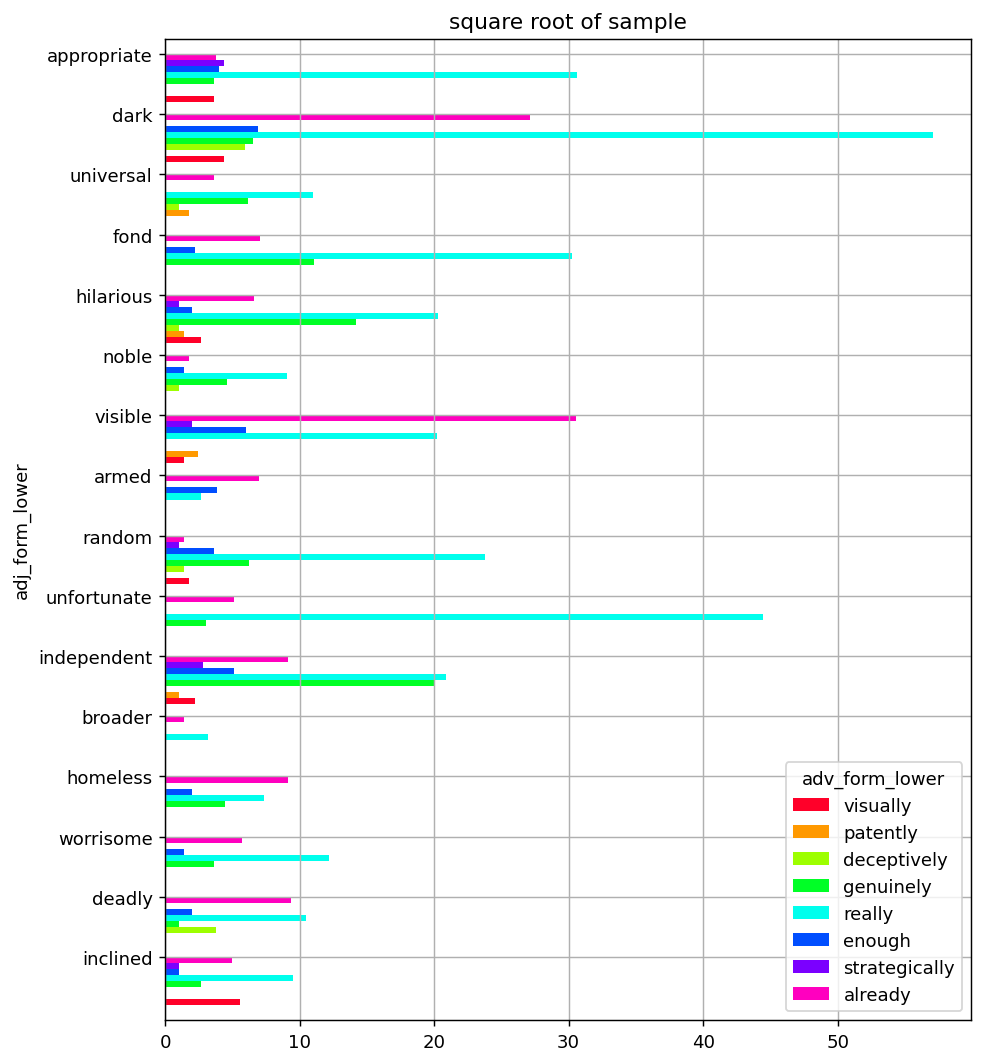

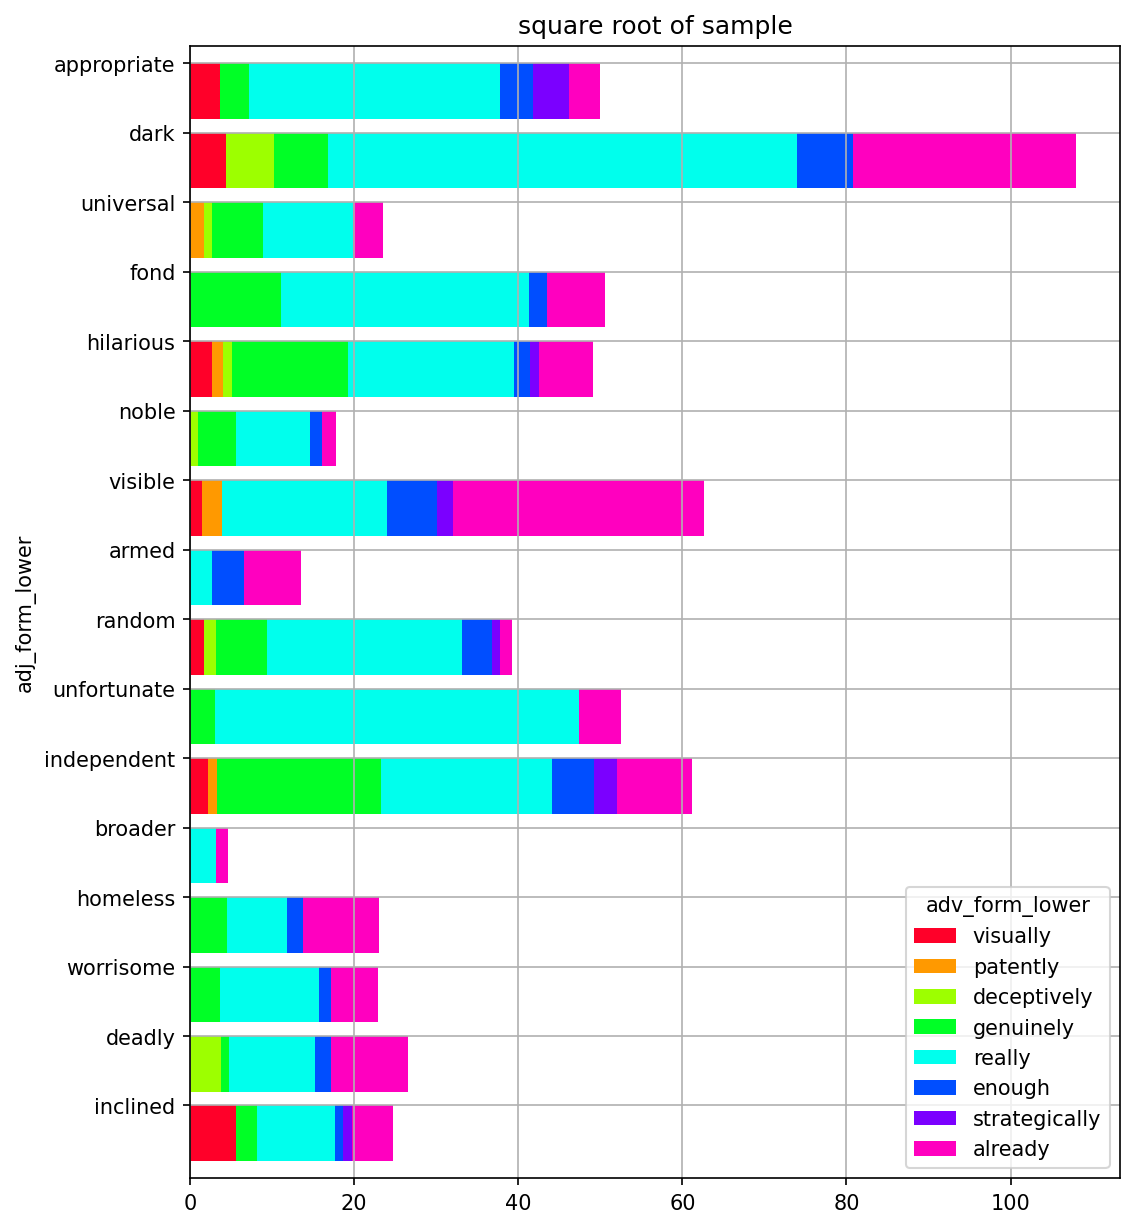

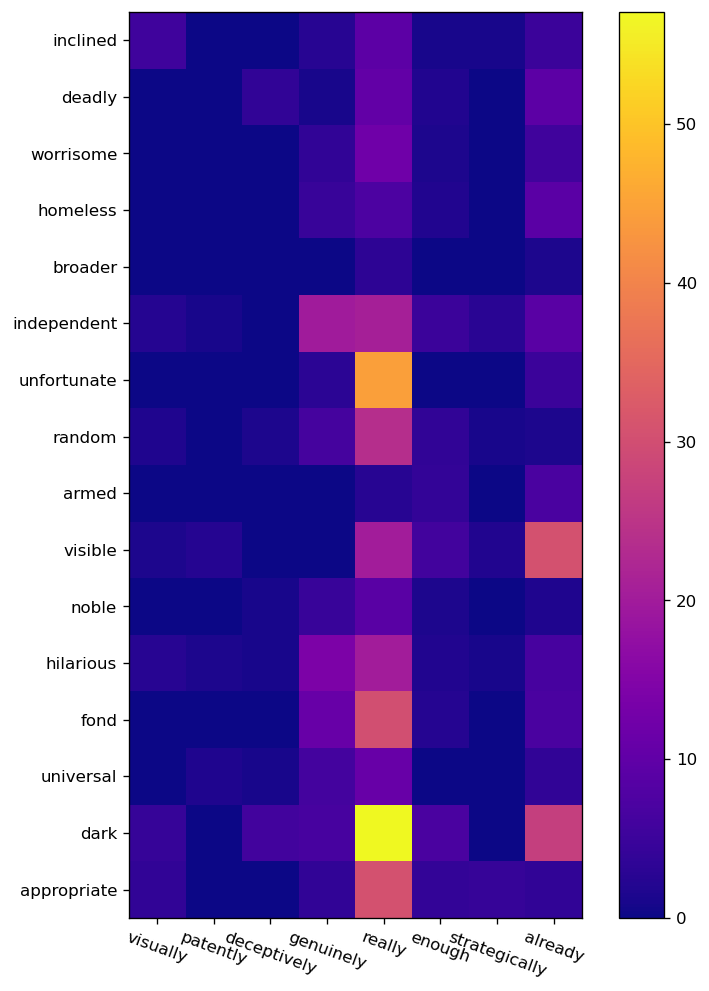

In [10]:
sqrt0_head, sqrt0_sample = sample_counts(
    frq0_sqrt, label='square root')

In [11]:
sqrt0_sample.round(1)

adv_form_lower,visually,patently,deceptively,genuinely,really,enough,strategically,already
adj_form_lower,,,,,,,,
inclined,5.6,0.0,0.0,2.6,9.5,1.0,1.0,5.0
deadly,0.0,0.0,3.7,1.0,10.4,2.0,0.0,9.4
worrisome,0.0,0.0,0.0,3.6,12.2,1.4,0.0,5.7
homeless,0.0,0.0,0.0,4.5,7.3,2.0,0.0,9.2
broader,0.0,0.0,0.0,0.0,3.2,0.0,0.0,1.4
independent,2.2,1.0,0.0,20.0,20.9,5.1,2.8,9.1
unfortunate,0.0,0.0,0.0,3.0,44.5,0.0,0.0,5.1
random,1.7,0.0,1.4,6.2,23.8,3.6,1.0,1.4
armed,0.0,0.0,0.0,0.0,2.6,3.9,0.0,7.0


  ### Log 10

  Data can also be transformed by taking the log, but if there are zeros in the data, some constant must be uniformly added first.

  `+1` is recommended along with log base 10, because:
  1. with log base 10, the transformed data is easier to interpret without backtransforming. e.g. a log value of *2.xx* clearly corresponds to an original value between `100` ($10^2$) and `1000` ($10^3$).
  2. if using base 10 for this reason, applying `+1` has the nice effect of keeping the zero cells at zero in the transformed data: $0+1=1$ and $log_{10}(1)=0$

In [12]:
frq_log10 = transform_counts(frq_raw, method='log10')
frq_log10.round(2)

adv_form_lower,very,more,most,so,not,as,too,really,much,pretty,...,scandalously,urgently,intolerably,madly,touchingly,on,emphatically,second-most,cosmetically,pointedly
adj_form_lower,,,,,,,,,,,,,,,,,,,,,
many,4.33,2.57,2.15,6.08,4.77,5.64,5.65,2.72,2.31,1.74,...,0.00,0.00,0.0,0.0,0.0,0.30,0.60,0.00,0.0,0.0
important,5.56,5.49,5.87,5.02,4.24,5.01,4.11,4.86,3.26,3.82,...,0.00,2.08,0.3,0.3,0.0,0.00,0.48,2.03,1.0,0.0
good,5.71,4.28,3.72,5.19,4.98,5.37,4.78,5.42,4.16,5.39,...,1.08,0.48,0.3,0.7,0.3,0.30,0.85,0.00,0.9,0.0
much,4.63,2.01,1.36,5.79,4.82,5.55,5.77,3.49,2.45,4.76,...,0.00,0.00,0.0,0.0,0.0,1.98,0.00,0.00,0.0,0.3
likely,4.56,5.70,5.28,2.93,4.67,4.50,3.08,2.67,2.41,3.12,...,0.00,0.00,0.0,0.0,0.0,0.00,0.00,1.11,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
untrained,1.00,1.04,1.64,1.08,0.78,1.18,0.95,0.30,0.30,0.60,...,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0
carnal,1.54,2.18,1.80,1.45,2.37,1.32,1.04,0.60,0.60,0.00,...,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0
contiguous,0.70,2.03,0.95,0.85,2.30,0.90,0.30,0.60,0.78,0.70,...,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0


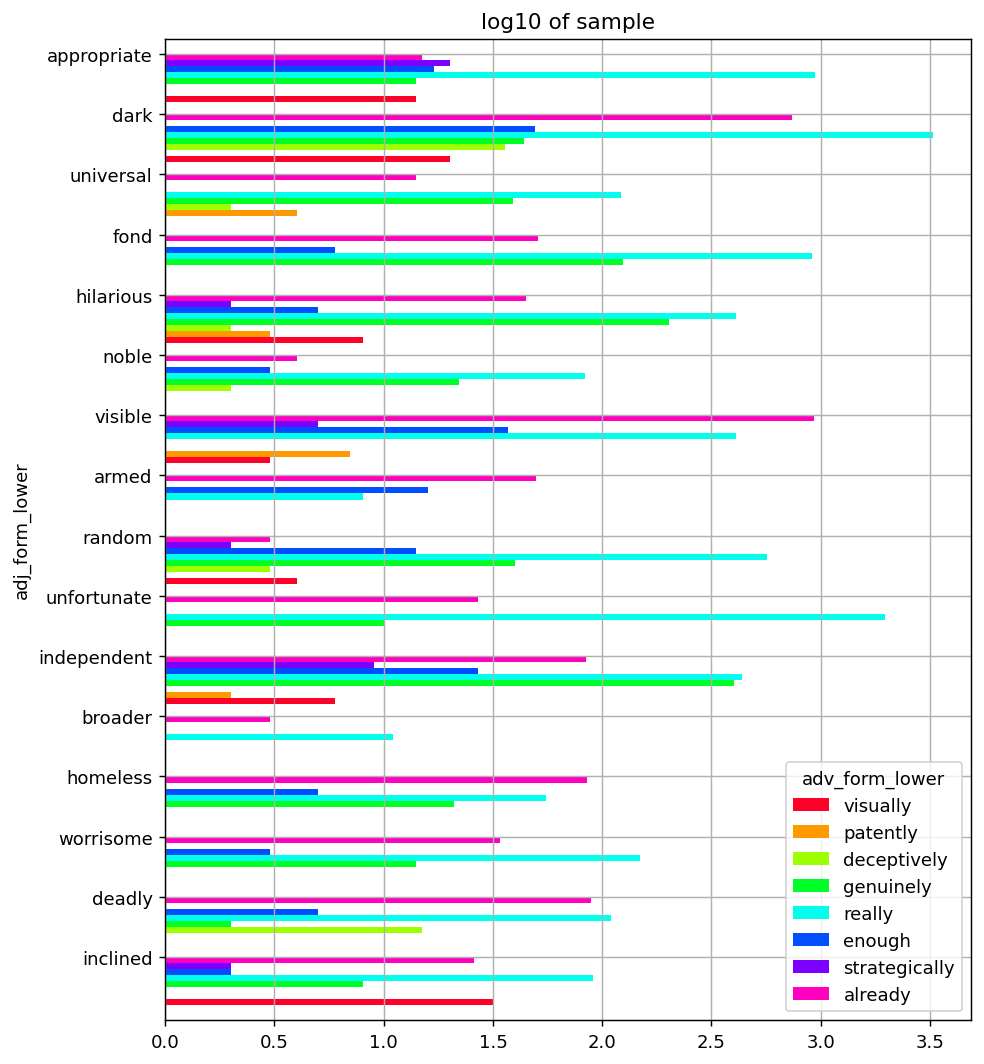

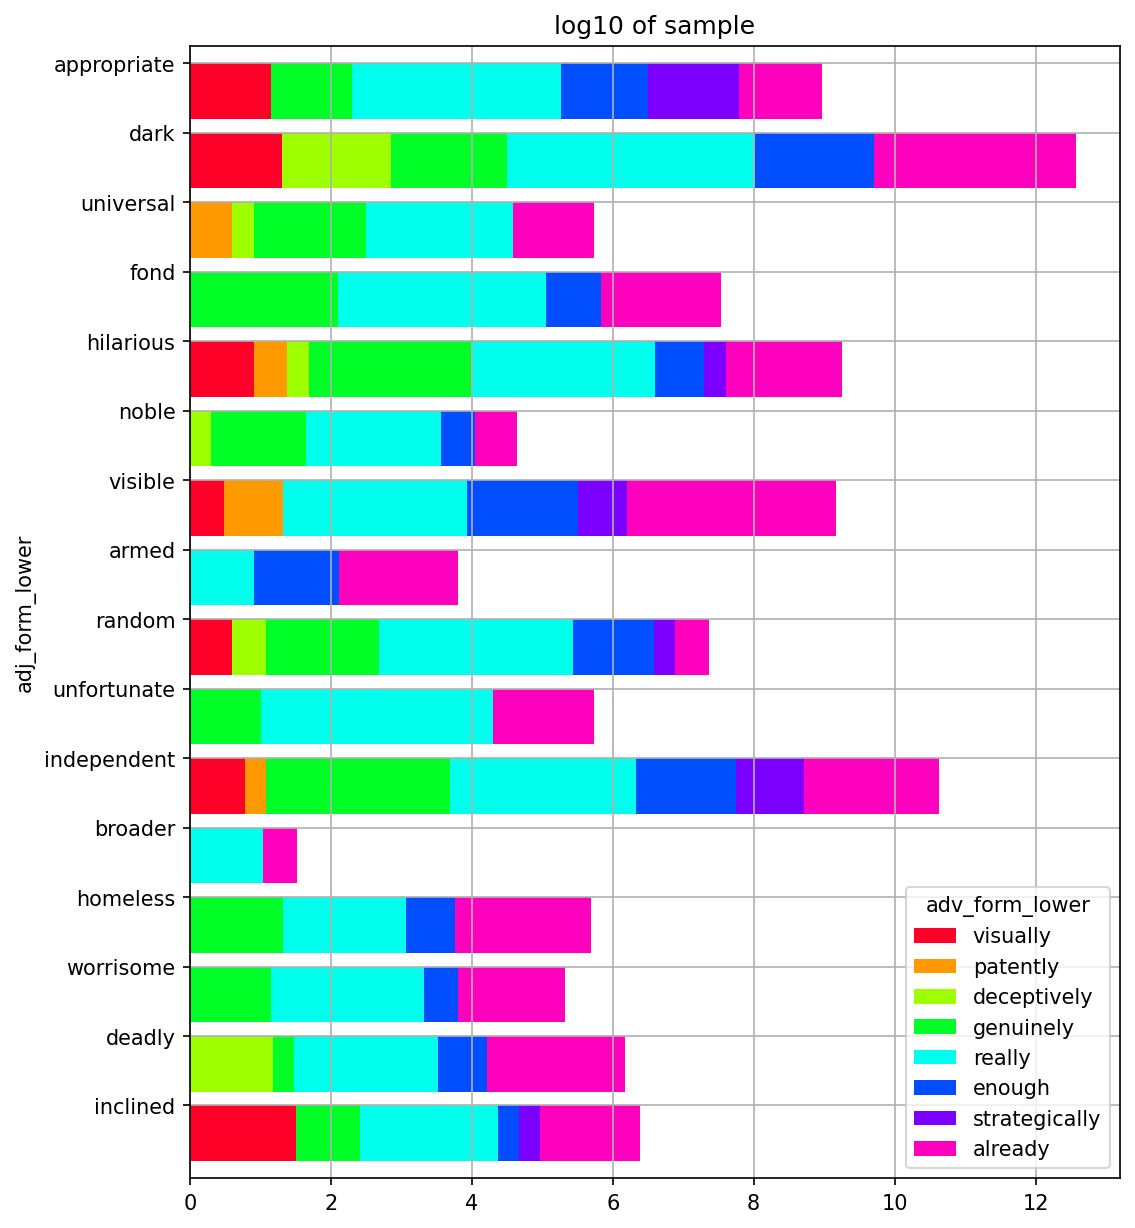

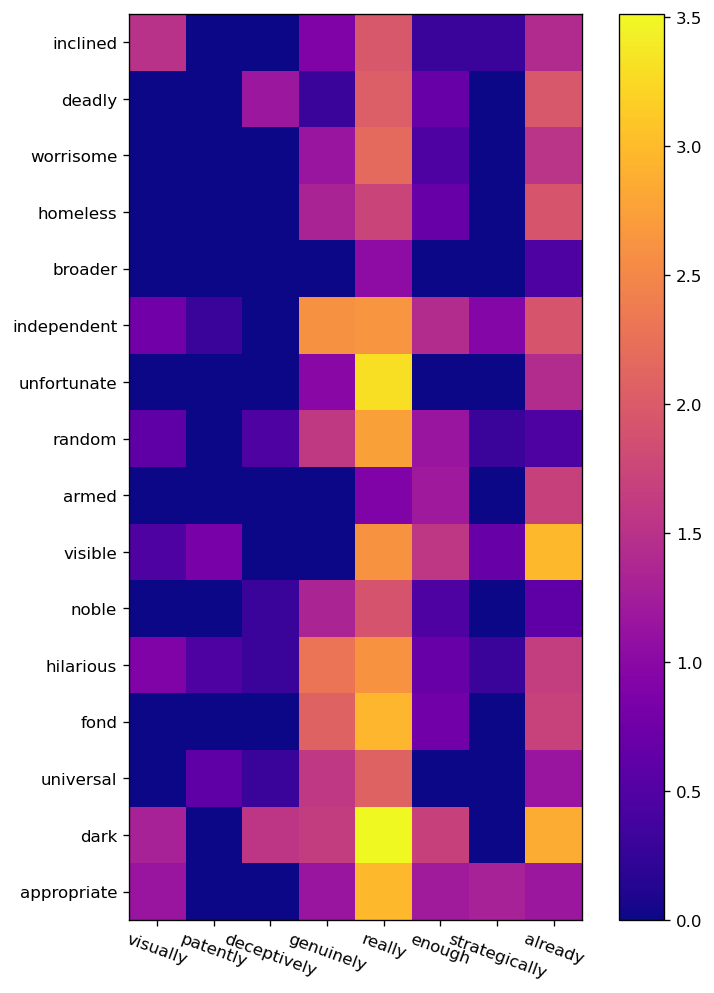

In [13]:
log10_head, log10_sample = sample_counts(
    frq_log10, label='log10', 
    rows=sqrt0_sample.index, 
    columns=sqrt0_sample.columns)

In [14]:
log10_sample.round(2)

adv_form_lower,visually,patently,deceptively,genuinely,really,enough,strategically,already
adj_form_lower,,,,,,,,
inclined,1.51,0.00,0.00,0.90,1.96,0.30,0.30,1.41
deadly,0.00,0.00,1.18,0.30,2.04,0.70,0.00,1.95
worrisome,0.00,0.00,0.00,1.15,2.17,0.48,0.00,1.53
homeless,0.00,0.00,0.00,1.32,1.74,0.70,0.00,1.93
broader,0.00,0.00,0.00,0.00,1.04,0.00,0.00,0.48
independent,0.78,0.30,0.00,2.60,2.64,1.43,0.95,1.92
unfortunate,0.00,0.00,0.00,1.00,3.30,0.00,0.00,1.43
random,0.60,0.00,0.48,1.60,2.75,1.15,0.30,0.48
armed,0.00,0.00,0.00,0.00,0.90,1.20,0.00,1.70


In [15]:
_enhance_descrip(frq_log10)

,count,mean,std,min,25%,50%,75%,max,total,var_coeff,range,IQ_range,upper_fence,lower_fence,plus1_geo_mean,plus1_har_mean
adv_form_lower,,,,,,,,,,,,,,,,
very,3894,2.2,1.0,0,1.6,2.2,2.8,5.7,8681.0,0.4,5.7,1.2,4.6,-0.1,3.1,2.9
more,3894,2.6,0.8,0,2.0,2.5,3.0,5.7,9948.5,0.3,5.7,1.0,4.6,0.5,3.5,3.4
most,3894,2.2,0.9,0,1.6,2.2,2.8,5.9,8524.1,0.4,5.9,1.2,4.5,-0.1,3.0,2.9
so,3894,2.1,0.9,0,1.5,2.1,2.6,6.1,8025.6,0.4,6.1,1.1,4.2,-0.1,2.9,2.8
not,3894,1.9,0.9,0,1.3,1.8,2.4,5.7,7414.0,0.5,5.7,1.1,4.1,-0.3,2.8,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
on,3894,0.0,0.1,0,0.0,0.0,0.0,2.4,71.3,6.6,2.4,0.0,0.0,0.0,1.0,1.0
emphatically,3894,0.0,0.1,0,0.0,0.0,0.0,2.0,166.9,3.3,2.0,0.0,0.0,0.0,1.0,1.0
second-most,3894,0.0,0.1,0,0.0,0.0,0.0,2.2,65.1,7.1,2.2,0.0,0.0,0.0,1.0,1.0


  > `+1` smoothing should not have a huge effect on the square root, however, it may be better to keep things consistent for comparison with log base 10 transformations.

In [16]:
_enhance_descrip(frq0_sqrt).round(1).median()

count             3894.0
mean                 0.3
std                  1.0
min                  0.0
25%                  0.0
50%                  0.0
75%                  0.0
max                 25.4
total             1066.0
var_coeff            3.3
range               25.4
IQ_range             0.0
upper_fence          0.0
lower_fence          0.0
plus1_geo_mean       1.2
plus1_har_mean       1.1
dtype: float64

In [17]:
frq1_sqrt = transform_counts(frq_raw, plus1=True)
_enhance_descrip(frq1_sqrt).round(1).median()

count             3894.0
mean                 1.2
std                  0.8
min                  1.0
25%                  1.0
50%                  1.0
75%                  1.0
max                 25.4
total             4539.2
var_coeff            0.7
range               24.4
IQ_range             0.0
upper_fence          1.0
lower_fence          1.0
plus1_geo_mean       2.1
plus1_har_mean       2.1
dtype: float64

In [18]:
_enhance_descrip(frq1_sqrt)

,count,mean,std,min,25%,50%,75%,max,total,var_coeff,range,IQ_range,upper_fence,lower_fence,plus1_geo_mean,plus1_har_mean
adv_form_lower,,,,,,,,,,,,,,,,
very,3894,25.5,43.5,1,6.6,12.5,26.1,712.4,99430.9,1.7,711.4,19.5,55.4,-22.6,14.7,9.4
more,3894,29.8,38.8,1,10.3,18.0,33.1,706.0,115915.2,1.3,705.0,22.8,67.3,-23.8,20.4,14.6
most,3894,22.5,37.9,1,6.3,12.1,24.2,865.2,87637.5,1.7,864.2,17.9,51.1,-20.6,14.0,9.4
so,3894,18.6,33.6,1,5.7,10.6,19.5,1091.7,72282.3,1.8,1090.7,13.7,40.1,-14.8,12.2,8.6
not,3894,16.2,29.6,1,4.6,8.4,16.5,683.5,62969.6,1.8,682.5,11.9,34.4,-13.3,10.4,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
on,3894,1.0,0.4,1,1.0,1.0,1.0,15.0,4044.8,0.4,14.0,0.0,1.0,1.0,2.0,2.0
emphatically,3894,1.1,0.3,1,1.0,1.0,1.0,10.4,4161.8,0.3,9.4,0.0,1.0,1.0,2.1,2.0
second-most,3894,1.0,0.4,1,1.0,1.0,1.0,12.8,4037.2,0.4,11.8,0.0,1.0,1.0,2.0,2.0


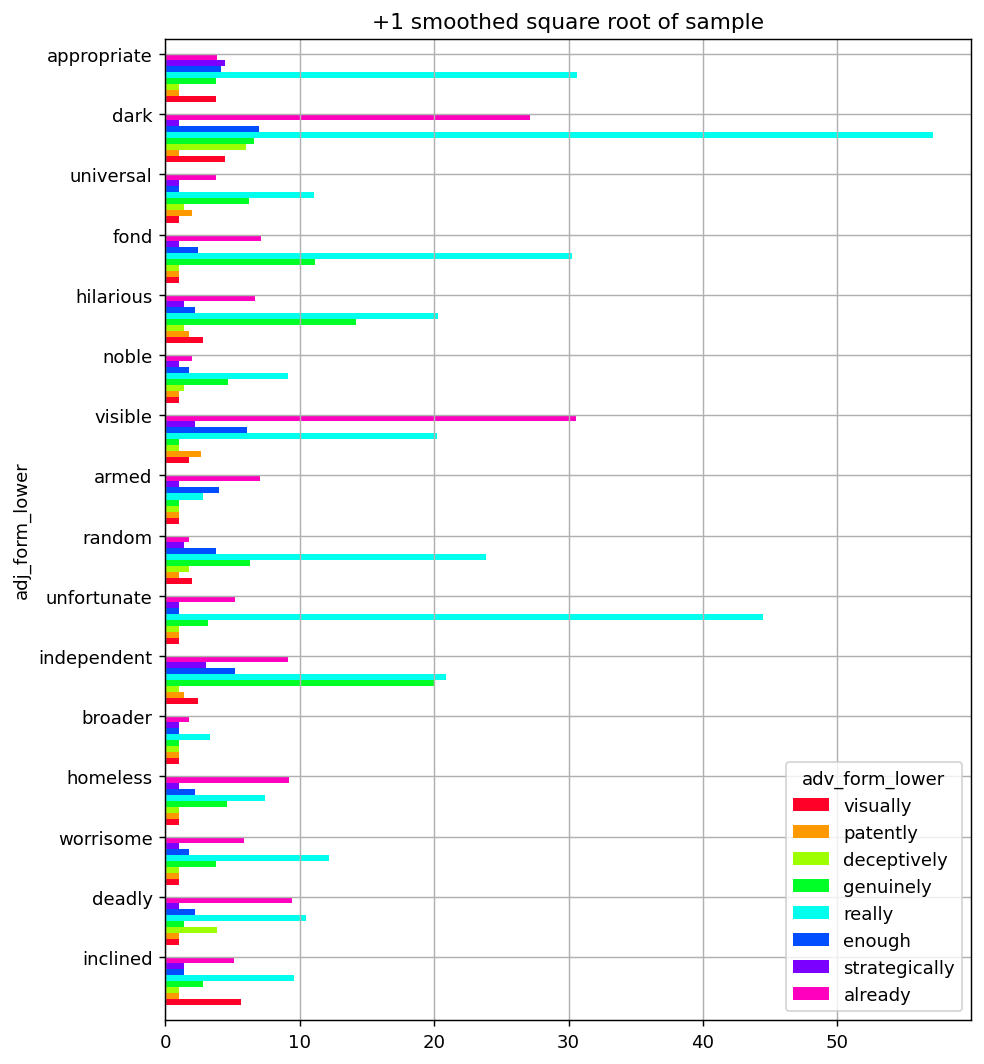

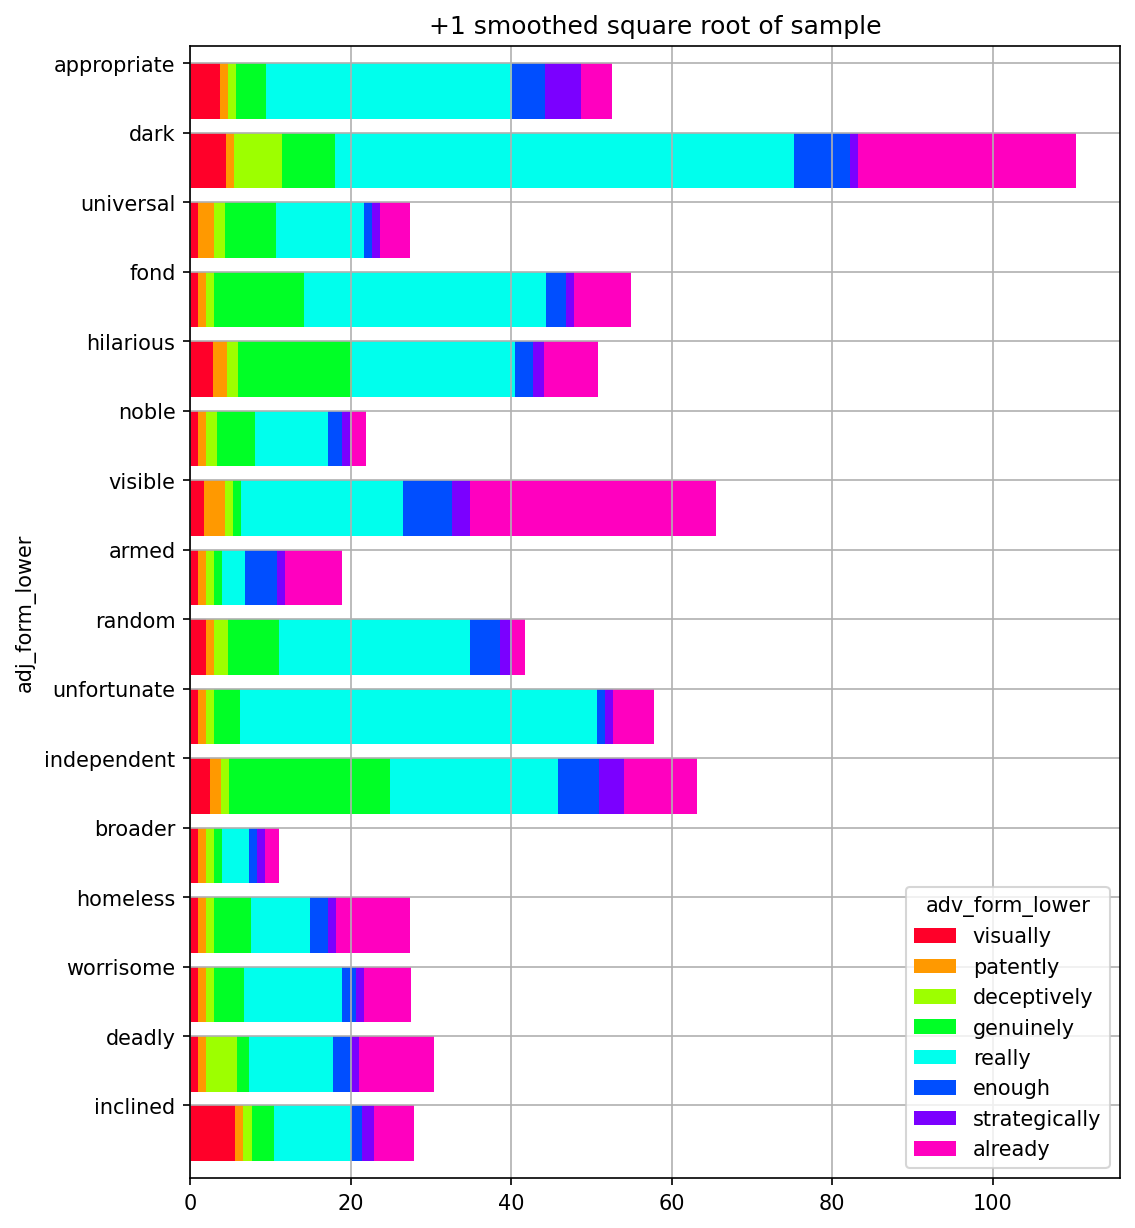

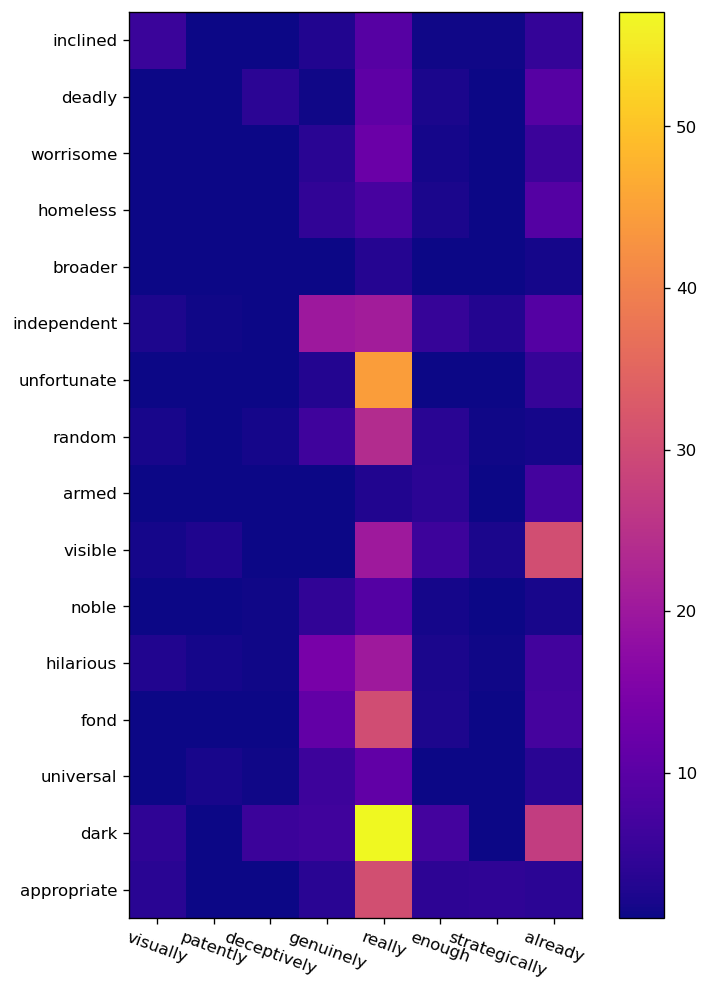

In [19]:
add1_sqrt_head, add1_sqrt_sample = sample_counts(
    frq1_sqrt, label='+1 smoothed square root', rows=sqrt0_sample.index, columns=sqrt0_sample.columns)

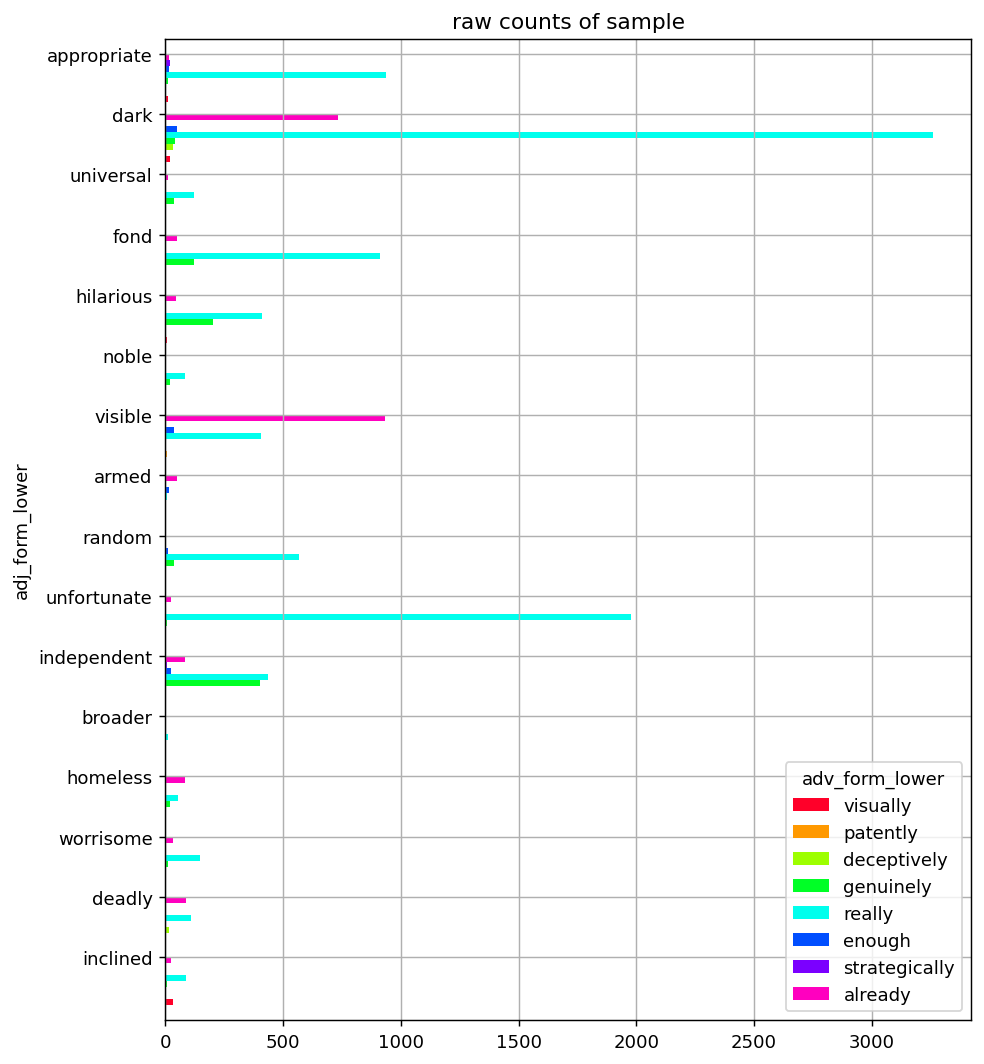

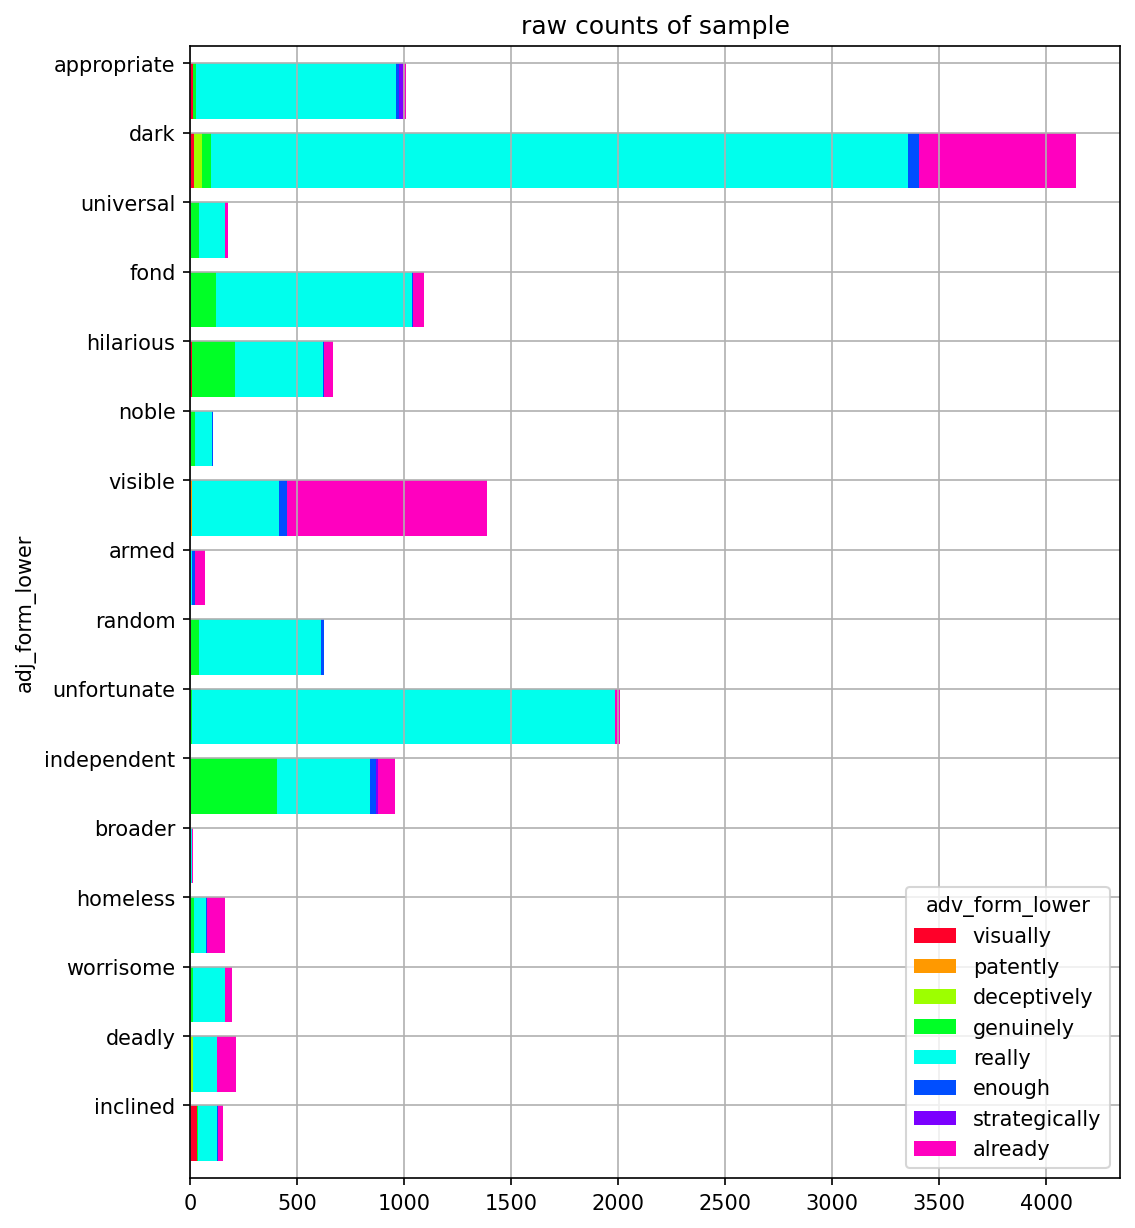

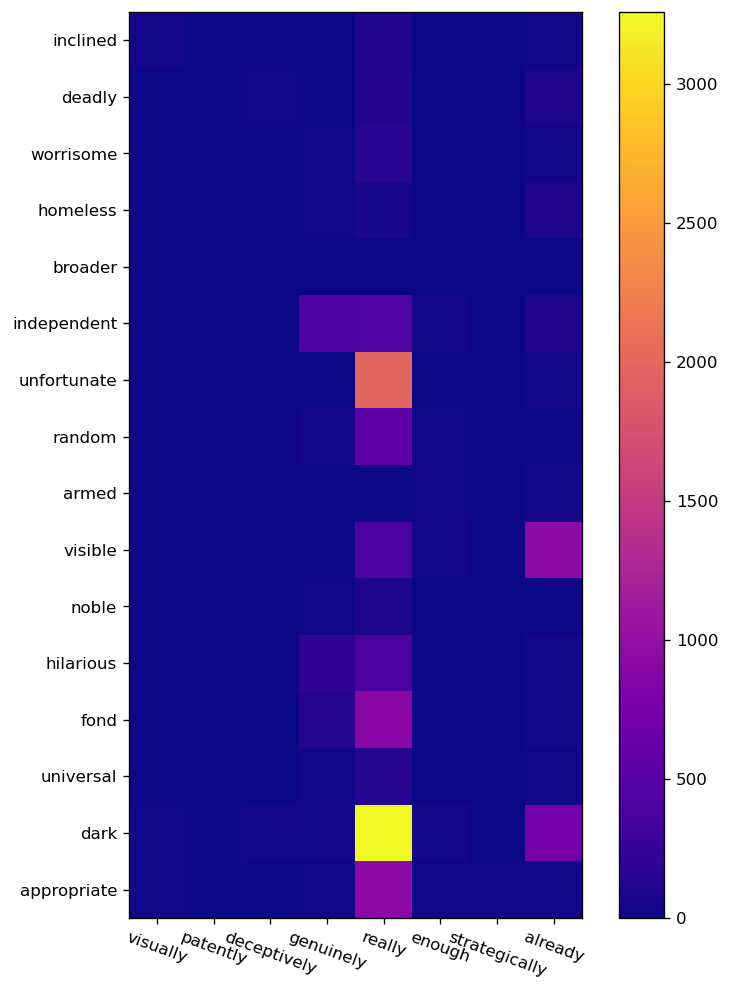

In [20]:
raw_head, raw_sample = sample_counts(
    frq_raw, label='raw counts', rows=sqrt0_sample.index, columns=sqrt0_sample.columns)

In [21]:
raw_sample

adv_form_lower,visually,patently,deceptively,genuinely,really,enough,strategically,already
adj_form_lower,,,,,,,,
inclined,31,0,0,7,90,1,1,25
deadly,0,0,14,1,109,4,0,88
worrisome,0,0,0,13,148,2,0,33
homeless,0,0,0,20,54,4,0,84
broader,0,0,0,0,10,0,0,2
independent,5,1,0,401,435,26,8,83
unfortunate,0,0,0,9,1976,0,0,26
random,3,0,2,39,567,13,1,2
armed,0,0,0,0,7,15,0,49


 ## Takeaways

 1. Clearly, the transformed frequencies allow for more patterns to be visible
    by mitigating the huge disparity between the most and least frequent elements.
    Even with a filtering threshold of `877` tokens/lemma, the raw count differences
    between individual lemma combinations/bigrams is still huge, ranging from `0` to `1,008,973`

      | adj_form_lower   |        so |
      |:-----------------|----------:|
      | many             | 1,008,973 |

In [22]:
def show_max(frq_df): 
    max_count = frq_df.max().max()
    print(frq_df.loc[frq_df.max(axis=1) == max_count,
        frq_df.max() == max_count].to_markdown(floatfmt=',.0f'))
    
show_max(frq_raw)

| adj_form_lower   |        so |
|:-----------------|----------:|
| many             | 1,191,864 |


 2. I think the square root transformation is better suited to this data landscape.
    Both transformations reduce the range of values to make them easier to conceptualize/visualize
    and find patterns, but the log transformed data goes *too* far, I feel.

    The initial range of `1.2 million` is compressed into `1.1 thousand` with the square root,
    but the log base 10 transformation compresses this into a range of `6`. At this end
    of the spectrum, the patterns just get lost for the opposite reason:
    Rather than the counts being *too **far***, they are *too **close***

In [23]:
print('square root (with raw counts as input)')
show_max(frq0_sqrt)
print('\n(with +1 smoothed counts as input)')
show_max(frq1_sqrt)
print('\nLog base 10')
show_max(frq_log10)

square root (with raw counts as input)
| adj_form_lower   |    so |
|:-----------------|------:|
| many             | 1,092 |

(with +1 smoothed counts as input)
| adj_form_lower   |    so |
|:-----------------|------:|
| many             | 1,092 |

Log base 10
| adj_form_lower   |   so |
|:-----------------|-----:|
| many             |    6 |


square root (with raw counts as input)
| adj_form_lower   |    so |
|:-----------------|------:|
| many             | 1,004 |

(with +1 smoothed counts as input)
| adj_form_lower   |    so |
|:-----------------|------:|
| many             | 1,004 |

Log base 10
| adj_form_lower   |   so |
|:-----------------|-----:|
| many             |    6 |

    * the binary log would be better than base 10, with a compressed range of `20` at least,
      instead of `6`, but that's still a huge difference from the initial range.

In [24]:
show_max(transform_counts(frq_raw, method='log2'))
frq_log2 = transform_counts(frq_raw, method='log2')
_enhance_descrip(frq_log2)

| adj_form_lower   |   so |
|:-----------------|-----:|
| many             |   20 |


,count,mean,std,min,25%,50%,75%,max,total,var_coeff,range,IQ_range,upper_fence,lower_fence,plus1_geo_mean,plus1_har_mean
adv_form_lower,,,,,,,,,,,,,,,,
very,3894,7.4,3.3,0,5.5,7.3,9.4,19.0,28837.7,0.4,19.0,4.0,15.4,-0.5,7.6,6.4
more,3894,8.5,2.6,0,6.7,8.3,10.1,18.9,33048.3,0.3,18.9,3.4,15.1,1.7,9.1,8.6
most,3894,7.3,3.0,0,5.3,7.2,9.2,19.5,28316.4,0.4,19.5,3.9,15.0,-0.5,7.6,6.5
so,3894,6.8,2.9,0,5.0,6.8,8.6,20.2,26660.6,0.4,20.2,3.5,13.8,-0.2,7.2,6.2
not,3894,6.3,2.9,0,4.4,6.1,8.1,18.8,24628.9,0.5,18.8,3.7,13.6,-1.2,6.6,5.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
on,3894,0.1,0.4,0,0.0,0.0,0.0,7.8,237.0,6.6,7.8,0.0,0.0,0.0,1.0,1.0
emphatically,3894,0.1,0.5,0,0.0,0.0,0.0,6.8,554.5,3.3,6.8,0.0,0.0,0.0,1.1,1.1
second-most,3894,0.1,0.4,0,0.0,0.0,0.0,7.4,216.4,7.1,7.4,0.0,0.0,0.0,1.0,1.0


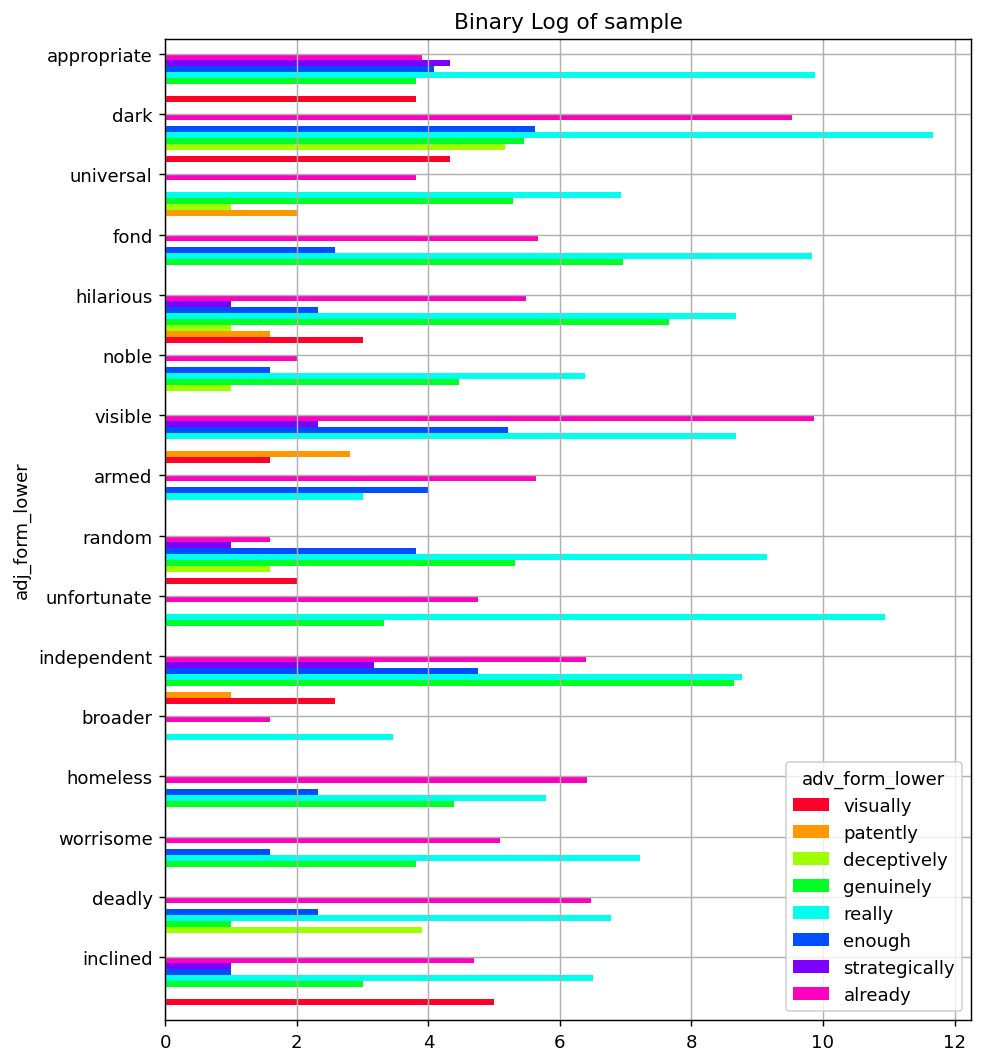

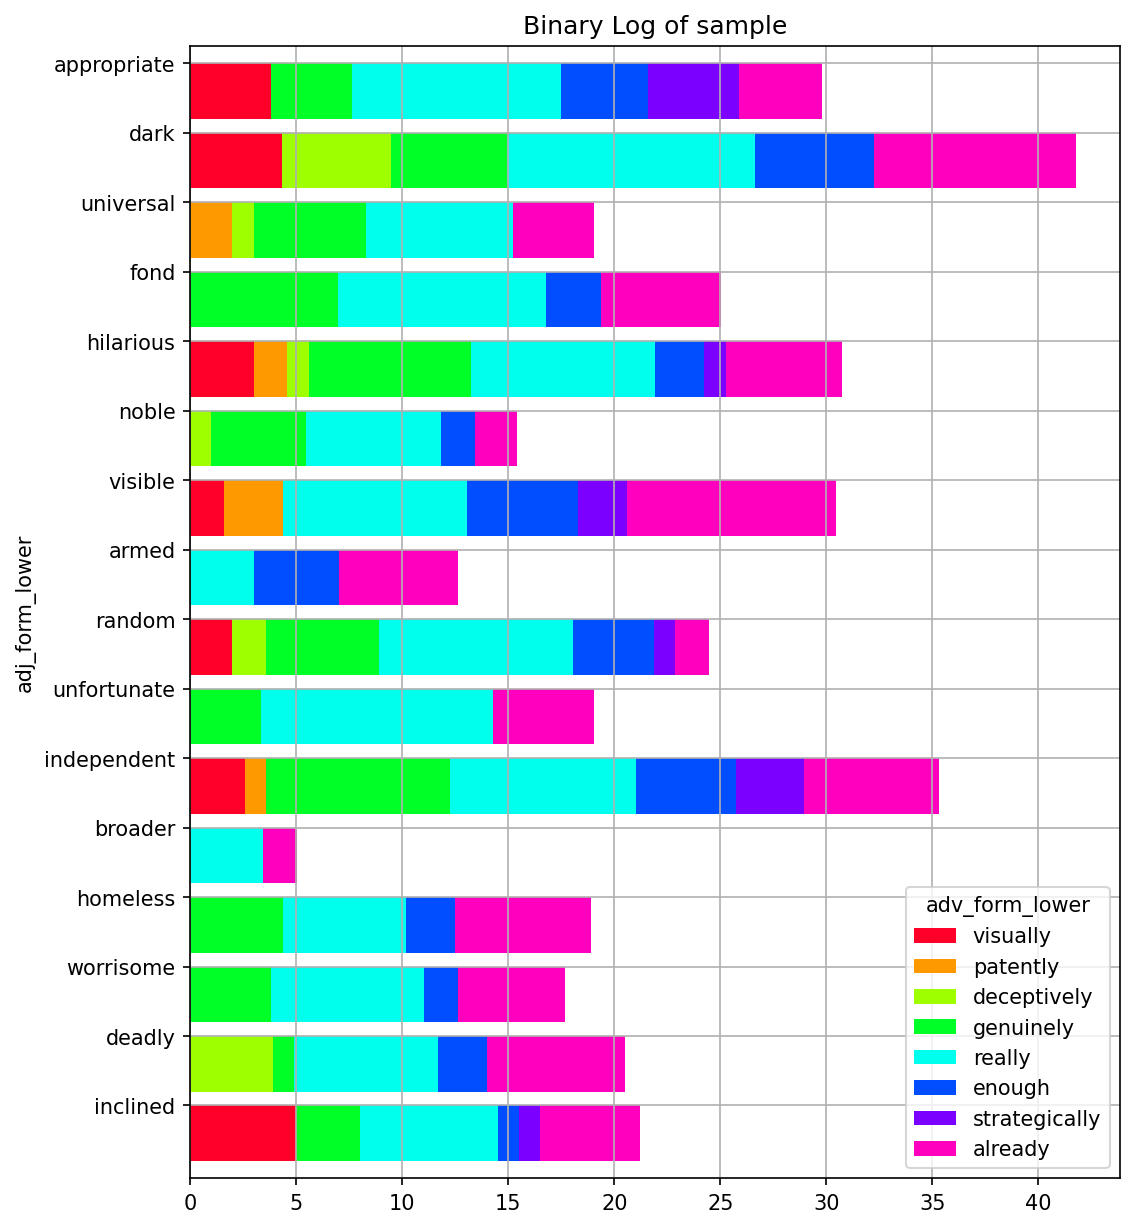

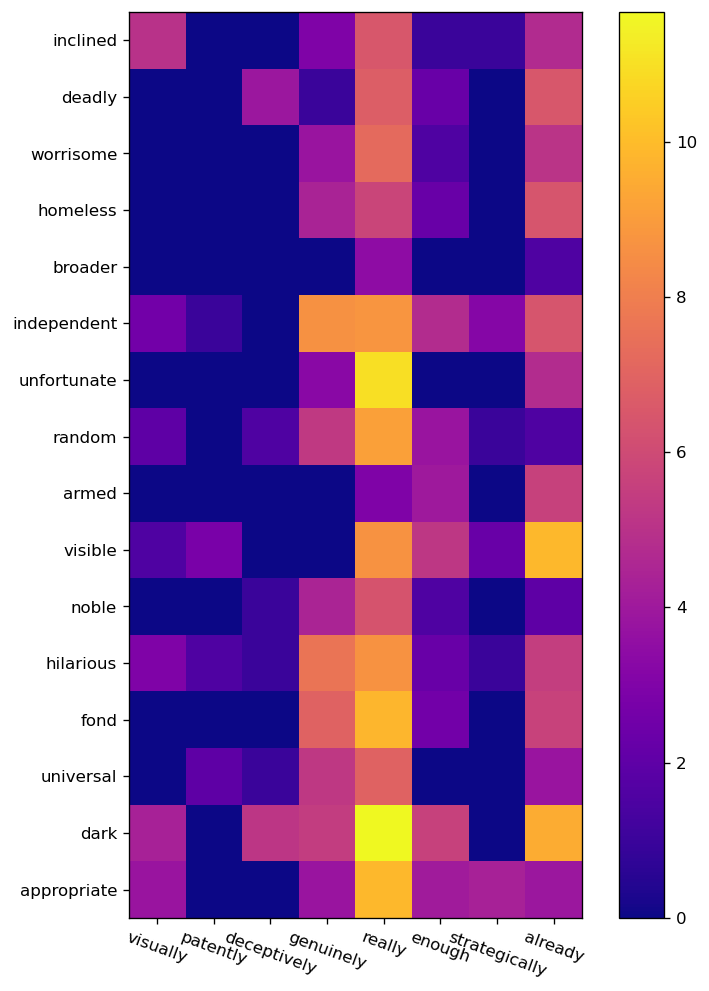

In [25]:
log2_head, log2_sample = sample_counts(frq_log2, label='Binary Log', 
                                       rows=sqrt0_sample.index, 
                                       columns=sqrt0_sample.columns)

In [26]:
log2_sample.round(2)

adv_form_lower,visually,patently,deceptively,genuinely,really,enough,strategically,already
adj_form_lower,,,,,,,,
inclined,5.00,0.00,0.00,3.00,6.51,1.00,1.00,4.70
deadly,0.00,0.00,3.91,1.00,6.78,2.32,0.00,6.48
worrisome,0.00,0.00,0.00,3.81,7.22,1.58,0.00,5.09
homeless,0.00,0.00,0.00,4.39,5.78,2.32,0.00,6.41
broader,0.00,0.00,0.00,0.00,3.46,0.00,0.00,1.58
independent,2.58,1.00,0.00,8.65,8.77,4.75,3.17,6.39
unfortunate,0.00,0.00,0.00,3.32,10.95,0.00,0.00,4.75
random,2.00,0.00,1.58,5.32,9.15,3.81,1.00,1.58
armed,0.00,0.00,0.00,0.00,3.00,4.00,0.00,5.64


In [27]:
def arrange_paths(prefix_list: list,
                  object_list: list,
                  base_name: str='tmp.txt',
                  parent_dir: Path = Path.cwd(),
                  new_suffix: str = '',
                  sep: str = '_', 
                  temp: bool = False) -> dict:
    
    fields = ['path', 'parent', 'stem', 'extension', 'obj', 'type']
    defaults = [None] * len(fields)
    try:
        directory_entry = namedtuple('FileDirectoryEntry', fields,
                                     defaults=defaults)
    except NameError:
        from collections import namedtuple
        directory_entry = namedtuple('FileDirectoryEntry', fields,
                                     defaults=defaults)
    if temp: 
        parent_dir = parent_dir.joinpath('tmp')
    if parent_dir == Path.cwd():
        print('> All paths are relative to current working directory:',
              f'> + `{Path.cwd()}/`',
              sep='\n')
    if not parent_dir.is_dir(): 
        parent_dir.mkdir(parents=True)

    rel_base_path = Path(base_name)
    base_stem = rel_base_path.stem
    if new_suffix:
        ext = f".{new_suffix.strip('.')}"
    else:
        ext = rel_base_path.suffix
        
    directory_dict = {}
    for prefix, obj in zip(prefix_list, object_list):
        fstem = f"{prefix}{sep}{base_stem}"
        directory_dict[prefix] = directory_entry(
            parent=parent_dir,
            stem=fstem,
            extension=ext,
            path=parent_dir.joinpath(fstem+ext),
            obj=obj,
            type=type(obj))
    return directory_dict

In [28]:
def show_directory(directory:dict):
    lines = []
    for i, entry in enumerate(directory.values()):
        if i == 0:
            lines.append(f'{entry.parent}/')
            
        lines.append(f'  ↪  {entry.stem}({entry.extension})')
    print('\n'.join(lines))

In [29]:
def corners(df, size:int=5): 
    index_name = df.index.name
    columns_name = df.columns.name
    df = df.reset_index().reset_index().set_index(
        ['index', index_name])
    df = df.T.reset_index().reset_index().set_index(
        ['index', columns_name]).T
    cdf = pd.concat(
        [dfs.iloc[:, :size].assign(__='...').join(
            dfs.iloc[:, -size:])
        for dfs in (df.head(size).T.assign(__='...').T, 
                    df.tail(size))]
        )
    cdf = cdf.reset_index().set_index(index_name)
    cdf.pop('index')
    cdf = cdf.T.reset_index().set_index(columns_name)
    cdf.pop('index')
    return cdf.T.rename(columns={'':'...'}, index={'':'...'})
# corners(frq_raw)

In [30]:
def write_directory(directory:dict, iter_sep:str='\n'):
    for label, entry in directory.items(): 
        obj = entry.obj
        path = entry.path
        if not path.is_file(): 
            ext = entry.extension
            print(f'+ writing {label} to {ext} file...')
            
            if ext.endswith('sv'):
                sep_dict = {'.csv': ',',
                            '.tsv': '\t',
                            '.psv': '|'}
                try:
                    obj.to_csv(path, sep=sep_dict[ext], encoding='utf8')
                except AttributeError:
                    pass
                else: 
                    continue

            if ext.endswith('pkl'): 
                try:
                    obj.to_pickle(path)
                except AttributeError: 
                    pass
                else: 
                    continue

            if ext.endswith('json'): 
                try: 
                    __ = json.dumps(obj)
                except NameError: 
                    import json
                obj = json.dumps(obj, indent=2)
                
            elif str(entry.type).endswith(("'list'>", "'tuple'>", "'dict'>", "'set'>")):
                if isinstance(obj, dict): 
                    # key_width = len(max(list(obj.keys()))
                    obj = [f'{k} : {v}' for k, v in obj.items()]
                obj = iter_sep.join(obj)
            
            if ext.endswith('md'): 
                title = f'# {entry.k}'
            path.write_text(str(obj), encoding='utf8')
        else:
            print(f'* ({path.name} previously saved on:',
                    (pd.Timestamp.fromtimestamp(path.stat().st_mtime)
                    .strftime("%a %x at %I:%M%p").capitalize()
                    +'.)')
                )    

In [31]:
transform_dir = INPUT_FREQ_PATH.parent.with_name('transformed')
output_directory = arrange_paths(parent_dir=transform_dir, 
              prefix_list=['sqrt', 'log2', 'add1'], 
              object_list=[frq1_sqrt, frq_log2, frq_raw.add(1)], 
              base_name=INPUT_FREQ_PATH.name)

print(len(output_directory), 'entries:', list(output_directory.keys()))

show_directory(output_directory)

3 entries: ['sqrt', 'log2', 'add1']
/share/compling/projects/sanpi/results/freq_out/transformed/
  ↪  sqrt_all_adj-x-adv_frq-thr0-001p.35f=868+.pkl(.gz)
  ↪  log2_all_adj-x-adv_frq-thr0-001p.35f=868+.pkl(.gz)
  ↪  add1_all_adj-x-adv_frq-thr0-001p.35f=868+.pkl(.gz)


In [32]:
for label in output_directory.keys():    
    print(f'\n## `{label}` info')
    for k,v in (output_directory[label]._asdict().items()): 
        if k == 'obj' and isinstance(v, pd.DataFrame): 
            v = corners(v.round(2), size=4).to_markdown(floatfmt=',.2f')
        else: 
            v = f'`{v}`'
        print(f'\n### `{label}` {k}\n' + v)


## `sqrt` info

### `sqrt` path
`/share/compling/projects/sanpi/results/freq_out/transformed/sqrt_all_adj-x-adv_frq-thr0-001p.35f=868+.pkl.gz`

### `sqrt` parent
`/share/compling/projects/sanpi/results/freq_out/transformed`

### `sqrt` stem
`sqrt_all_adj-x-adv_frq-thr0-001p.35f=868+.pkl`

### `sqrt` extension
`.gz`



### `sqrt` obj
| adj_form_lower   | very   | more   | most   | so      | ...   | emphatically   | second-most   | cosmetically   | pointedly   |
|:-----------------|:-------|:-------|:-------|:--------|:------|:---------------|:--------------|:---------------|:------------|
| many             | 145.73 | 19.34  | 11.87  | 1091.73 | ...   | 2.0            | 1.0           | 1.0            | 1.0         |
| important        | 599.68 | 553.72 | 865.18 | 324.82  | ...   | 1.73           | 10.3          | 3.16           | 1.0         |
| good             | 712.39 | 137.49 | 72.17  | 391.4   | ...   | 2.65           | 1.0           | 2.83           | 1.0         |
| much             | 205.83 | 10.15  | 4.8    | 784.0   | ...   | 1.0            | 1.0           | 1.0            | 1.41        |
| ...              | ...    | ...    | ...    | ...     | ...   | ...            | ...           | ...            | ...         |
| carnal           | 5.92   | 12.29  | 7.94   | 5.29    | ...   | 1.0     

### `sqrt` obj
| adj_form_lower   | very   | more   | most   | so      | ...   | cleverly   | intolerably   | such   | in    |
|:-----------------|:-------|:-------|:-------|:--------|:------|:-----------|:--------------|:-------|:------|
| many             | 134.61 | 17.8   | 10.95  | 1004.48 | ...   | 1.0        | 1.0           | 1.0    | 1.73  |
| important        | 555.29 | 505.61 | 796.5  | 299.71  | ...   | 1.0        | 1.41          | 4.0    | 2.24  |
| good             | 654.93 | 127.14 | 66.81  | 359.08  | ...   | 1.0        | 1.41          | 3.61   | 3.0   |
| much             | 186.42 | 9.8    | 4.47   | 711.53  | ...   | 1.0        | 1.0           | 2.65   | 13.19 |
| ...              | ...    | ...    | ...    | ...     | ...   | ...        | ...           | ...    | ...   |
| renown           | 3.32   | 5.57   | 16.19  | 4.0     | ...   | 1.0        | 1.0           | 1.0    | 1.0   |
| interventionist  | 4.0    | 16.55  | 5.1    | 3.16    | ...   | 1.0        | 1.0           | 1.0    | 1.0   |
| terminal         | 3.16   | 5.57   | 2.83   | 2.65    | ...   | 1.0        | 1.0           | 1.0    | 1.0   |
| oversized        | 5.39   | 6.16   | 3.74   | 5.66    | ...   | 1.0        | 1.0           | 1.0    | 1.0   |

### `sqrt` type
`<class 'pandas.core.frame.DataFrame'>`

## `log2` info

### `log2` path
`/share/compling/projects/sanpi/results/freq_out/transformed/log2_all_adj-x-adv_frq-thr0-001p.30f=732+.pkl.gz`

### `log2` parent
`/share/compling/projects/sanpi/results/freq_out/transformed`

### `log2` stem
`log2_all_adj-x-adv_frq-thr0-001p.30f=732+.pkl`

### `log2` extension
`.gz`

### `log2` obj
| adj_form_lower   | very   | more   | most   | so    | ...   | cleverly   | intolerably   | such              | in                 |
|:-----------------|:-------|:-------|:-------|:------|:------|:-----------|:--------------|:------------------|:-------------------|
| many             | 14.15  | 8.31   | 6.91   | 19.94 | ...   | 0.0        | 0.0           | 0.0               | 1.5800000429153442 |
| important        | 18.23  | 17.96  | 19.28  | 16.45 | ...   | 0.0        | 1.0           | 4.0               | 2.319999933242798  |
| good             | 18.71  | 13.98  | 12.12  | 16.98 | ...   | 0.0        | 1.0           | 3.700000047683716 | 3.1700000762939453 |
| much             | 15.08  | 6.58   | 4.32   | 18.95 | ...   | 0.0        | 0.0           | 2.809999942779541 | 7.440000057220459  |
| ...              | ...    | ...    | ...    | ...   | ...   | ...        | ...           | ...               | ...                |
| renown           | 3.46   | 4.95   | 8.03   | 4.0   | ...   | 0.0        | 0.0           | 0.0               | 0.0                |
| interventionist  | 4.0    | 8.1    | 4.7    | 3.32  | ...   | 0.0        | 0.0           | 0.0               | 0.0                |
| terminal         | 3.32   | 4.95   | 3.0    | 2.81  | ...   | 0.0        | 0.0           | 0.0               | 0.0                |
| oversized        | 4.86   | 5.25   | 3.81   | 5.0   | ...   | 0.0        | 0.0           | 0.0               | 0.0                |

### `log2` type
`<class 'pandas.core.frame.DataFrame'>`

## `add1` info

### `add1` path
`/share/compling/projects/sanpi/results/freq_out/transformed/add1_all_adj-x-adv_frq-thr0-001p.30f=732+.pkl.gz`

### `add1` parent
`/share/compling/projects/sanpi/results/freq_out/transformed`

### `add1` stem
`add1_all_adj-x-adv_frq-thr0-001p.30f=732+.pkl`

### `add1` extension
`.gz`

### `add1` obj
| adj_form_lower   | very   | more   | most   | so      | ...   | cleverly   | intolerably   | such   | in   |
|:-----------------|:-------|:-------|:-------|:--------|:------|:-----------|:--------------|:-------|:-----|
| many             | 18120  | 317    | 120    | 1008974 | ...   | 1          | 1             | 1      | 3    |
| important        | 308347 | 255637 | 634416 | 89827   | ...   | 1          | 2             | 16     | 5    |
| good             | 428936 | 16165  | 4464   | 128936  | ...   | 1          | 2             | 13     | 9    |
| much             | 34753  | 96     | 20     | 506279  | ...   | 1          | 1             | 7      | 174  |
| ...              | ...    | ...    | ...    | ...     | ...   | ...        | ...           | ...    | ...  |
| renown           | 11     | 31     | 262    | 16      | ...   | 1          | 1             | 1      | 1    |
| interventionist  | 16     | 274    | 26     | 10      | ...   | 1          | 1             | 1      | 1    |
| terminal         | 10     | 31     | 8      | 7       | ...   | 1          | 1             | 1      | 1    |
| oversized        | 29     | 38     | 14     | 32      | ...   | 1          | 1             | 1      | 1    |

### `add1` type
`<class 'pandas.core.frame.DataFrame'>`

In [33]:
write_directory(output_directory)

+ writing sqrt to .gz file...
+ writing log2 to .gz file...
+ writing add1 to .gz file...
